# Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 1 to 1492
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INPUT0    1492 non-null   float64
 1   INPUT1    1492 non-null   float64
 2   INPUT2    1492 non-null   float64
 3   INPUT3    1492 non-null   float64
 4   INPUT4    1492 non-null   float64
 5   INPUT5    1492 non-null   float64
 6   INPUT6    1492 non-null   float64
 7   INPUT7    1492 non-null   float64
 8   INPUT8    1492 non-null   float64
 9   TARGET_X  1492 non-null   float64
 10  TARGET_Y  1492 non-null   float64
dtypes: float64(11)
memory usage: 139.9 KB


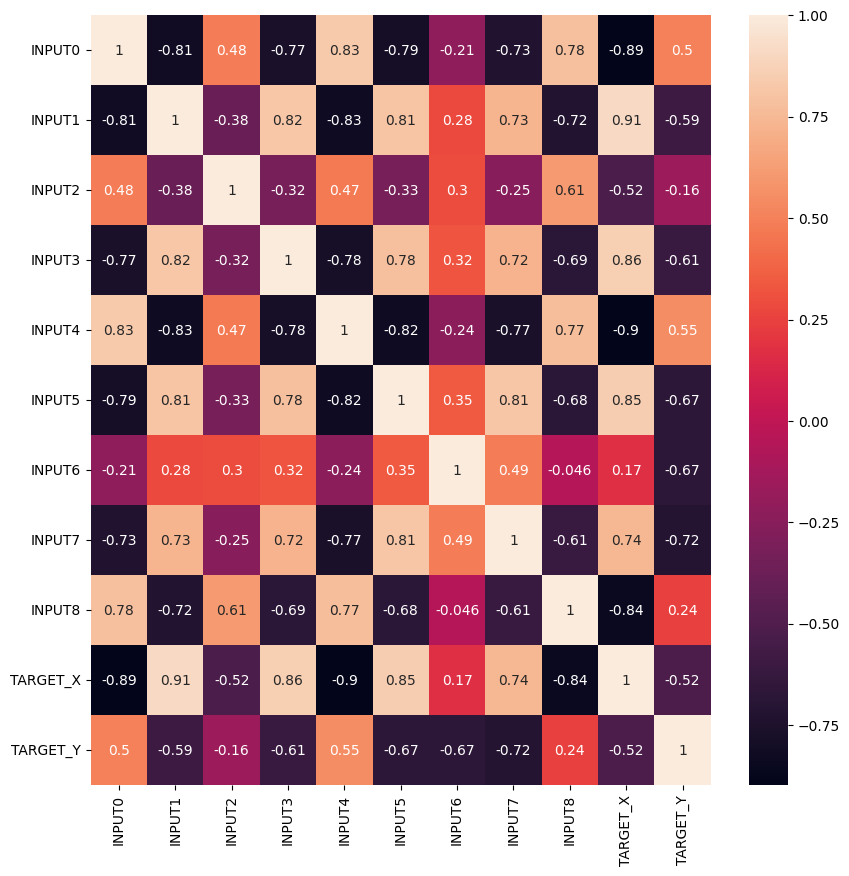

x_train  (1044, 9)
y_train  (1044, 2)
x_test  (448, 9)
y_test  (448, 2)


In [2]:
from set_extraction import x_train, y_train, x_test, y_test

# Models

In [3]:
from sklearn.metrics import make_scorer

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

In [4]:
def MEE(actual, predict):

    return np.mean(np.linalg.norm(actual - predict, axis=1))
    

In [5]:
results = []

# SVM

## SupportVectorRegression

### Grid search for parameter setting 


In [6]:
params = {'estimator__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
          'estimator__C' : [0.1, 0.5, 1, 2, 3],
          'estimator__coef0' : [0.0, 0.01, 0.1, 0.5],
          'estimator__gamma' : ['auto','scale'],
          'estimator__shrinking' : [True, False]
          } 

In [7]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1
svr_search = SVR()

svr_cv = GridSearchCV(estimator=MultiOutputRegressor(svr_search), param_grid=params, scoring=make_scorer(MEE, greater_is_better = False), 
                      cv=5, verbose=4, n_jobs=n_jobs_search) 
svr_cv.fit(x_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=MultiOutputRegressor(estimator=SVR()), n_jobs=-1,
             param_grid={'estimator__C': [0.1, 0.5, 1, 2, 3],
                         'estimator__coef0': [0.0, 0.01, 0.1, 0.5],
                         'estimator__gamma': ['auto', 'scale'],
                         'estimator__kernel': ['linear', 'poly', 'rbf',
                                               'sigmoid'],
                         'estimator__shrinking': [True, False]},
             scoring=make_scorer(MEE, greater_is_better=False), verbose=4)

In [8]:
svr_cv.best_params_

{'estimator__C': 3,
 'estimator__coef0': 0.0,
 'estimator__gamma': 'auto',
 'estimator__kernel': 'rbf',
 'estimator__shrinking': False}

In [9]:
# validation
svr_cv.best_score_

-1.4690176288696342

In [10]:
# save the model to disk
joblib.dump(svr_cv.best_estimator_, 'cup_models/svr.z')

['cup_models/svr.z']

### Final model

In [11]:
svr = joblib.load('cup_models/svr.z')

In [12]:
svr

MultiOutputRegressor(estimator=SVR(C=3, gamma='auto', shrinking=False))

In [13]:
train_pred_svr = svr.predict(x_train)

In [14]:
print('MEE train set ', MEE(y_train, train_pred_svr))

MEE train set  1.285542722406781


In [15]:
test_pred_svr = svr.predict(x_test)

In [16]:
print('MEE test set ', MEE(y_test, test_pred_svr))

MEE test set  1.468463936344887


[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

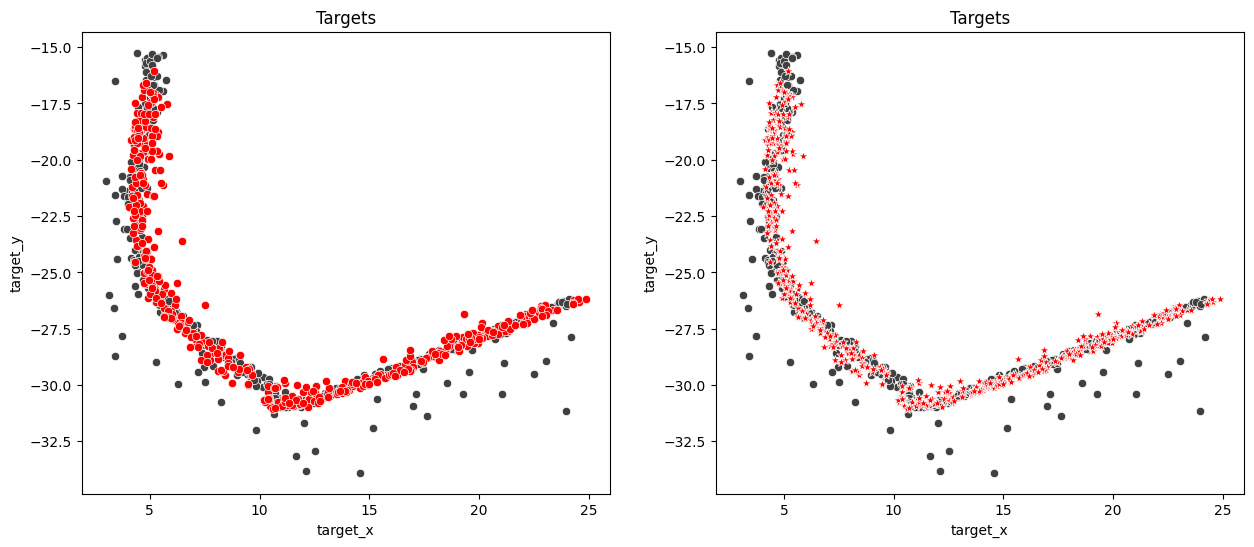

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[0])
sns.scatterplot(x=test_pred_svr[:,0],y=test_pred_svr[:,1],color='r',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[1])
sns.scatterplot(x=test_pred_svr[:,0],y=test_pred_svr[:,1],color='r',ax=ax[1], marker='*', s=50)
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

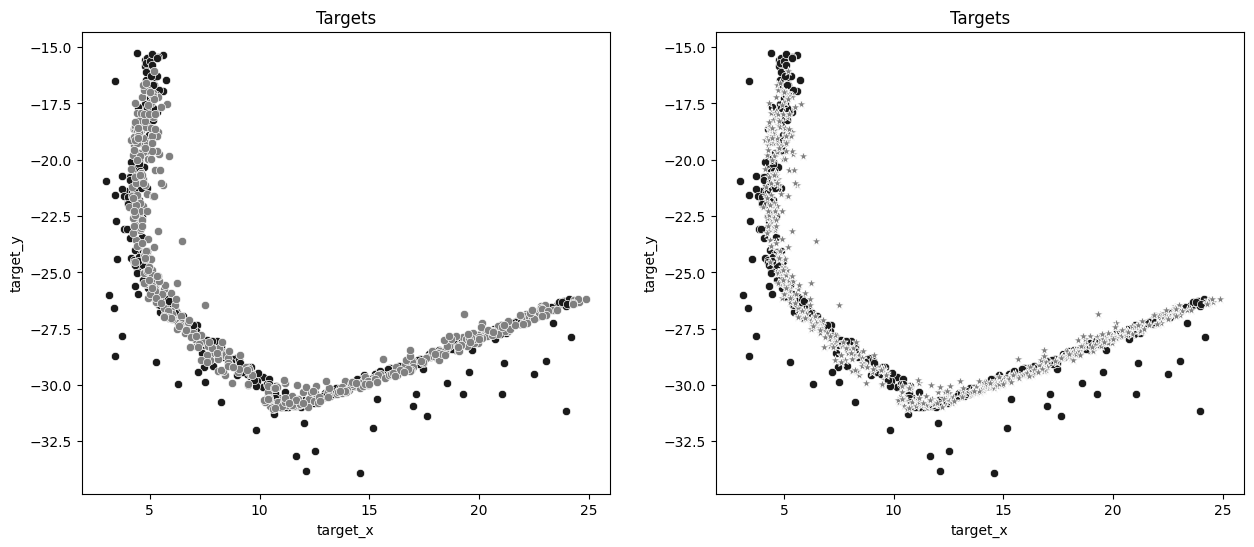

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[0])
sns.scatterplot(x=test_pred_svr[:,0],y=test_pred_svr[:,1],color='.5',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[1])
sns.scatterplot(x=test_pred_svr[:,0],y=test_pred_svr[:,1],color='.5',ax=ax[1], marker='*', s=50)
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

In [19]:
results.append(('SupportVectorRegression train', MEE(y_train, train_pred_svr)))
results.append(('SupportVectorRegression validation', svr_cv.best_score_))

# Summary

In [20]:
for i in range(len(results)):
  print(results[i])

('SupportVectorRegression train', 1.285542722406781)
('SupportVectorRegression validation', -1.4690176288696342)
